Load dataset

In [1]:
import os
import pandas as pd

PATH="dataset/iris_dataset/iris.csv"

def load_data(path=PATH):
    col_names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
    return pd.read_csv(path, names=col_names)



Examine Data

In [2]:
iris=load_data()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Lets give some value to identify the scpecies
Iris-virginica=0
Iris-versicolor=1
Iris-setosa=2
so we can examine the data a little deeper

In [5]:
import numpy as np
#Create numeric classes for species (0,1,2) 
#create a copy of the dataframe.
iris_copy=iris.copy(deep=False)
iris_copy.loc[iris['species']=="Iris-virginica",'class']=0
iris_copy.loc[iris['species']=="Iris-versicolor",'class']=1
iris_copy.loc[iris['species']=="Iris-setosa",'class'] = 2
iris_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,Iris-setosa,2.0
1,4.9,3.0,1.4,0.2,Iris-setosa,2.0
2,4.7,3.2,1.3,0.2,Iris-setosa,2.0
3,4.6,3.1,1.5,0.2,Iris-setosa,2.0
4,5.0,3.6,1.4,0.2,Iris-setosa,2.0


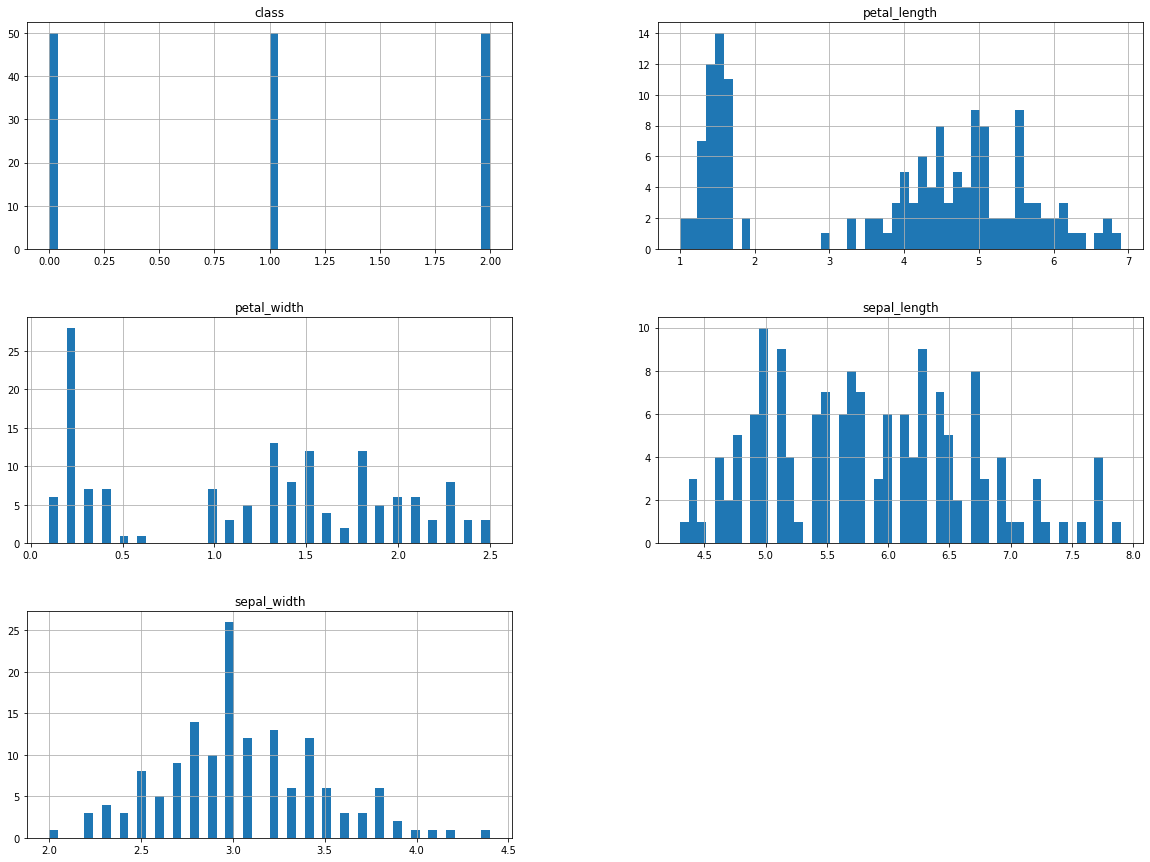

In [6]:
#only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
iris_copy.hist(bins=50, figsize=(20,15))
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11621bd10>,
      dtype=object)

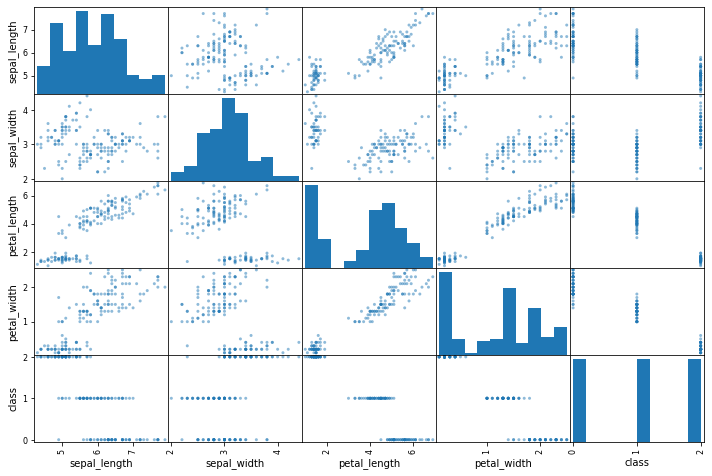

In [7]:
import pandas as pd
attributes = ["sepal_length", "sepal_width", "petal_length",
"petal_width", "class"]
pd.plotting.scatter_matrix(iris_copy[attributes], figsize=(12, 8))

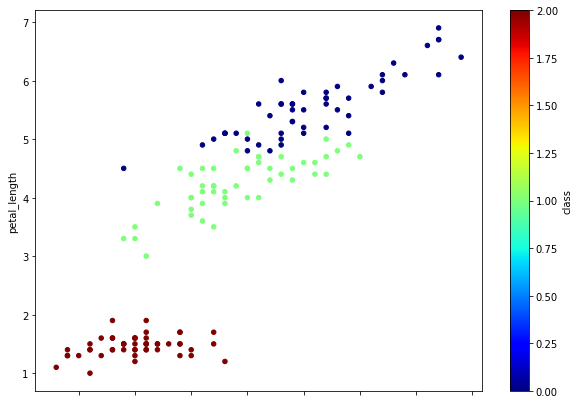

In [8]:
iris_copy.plot(kind="scatter", x="sepal_length", y="petal_length", alpha=0.999, figsize=(10,7),
c="class", cmap=plt.get_cmap("jet"), colorbar=True,) 


we are going to use the class 0 and 1 since they are not completely separable but we can use the pocket algorithm


In [9]:
#extract the dataset 
dataset = iris.iloc[50:150].values

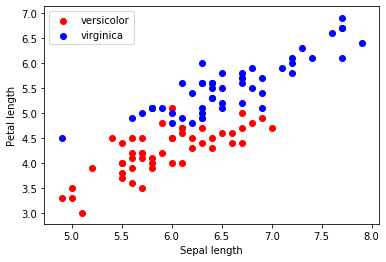

In [10]:
#plot the new data set using the sepal length and petal length
plt.scatter(dataset[0:50, 0],dataset[0:50, 2], color='red', marker='o', label='versicolor')
plt.scatter(dataset[50:100, 0],dataset[50:100, 2], color='blue', marker='o', label='virginica')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()


Pocket Algorithm


Prepare the data

In [11]:
#split dataset in training and testing 
from sklearn.model_selection import train_test_split
dataset=pd.DataFrame(dataset)
#give numerical value to the class
dataset.loc[dataset[4]=="Iris-versicolor",4]=-1
dataset.loc[dataset[4]=="Iris-virginica",4]=1
dataset.insert (0,'bias', 1)
train_set,test_set=train_test_split(dataset, test_size=0.2, random_state=42)
#define features and target
x_train = train_set.iloc[ : , [0,1,3]].values
y_train= train_set.iloc[ : , 5].values
x_test=test_set.iloc[: , [0,1,3]].values
y_test=test_set.iloc[ : , 5].values


<class 'numpy.ndarray'>


In [12]:
dataset.head()

,bias,0,1,2,3,4
0,1,7,3.2,4.7,1.4,-1
1,1,6.4,3.2,4.5,1.5,-1
2,1,6.9,3.1,4.9,1.5,-1
3,1,5.5,2.3,4,1.3,-1
4,1,6.5,2.8,4.6,1.5,-1


Train the model

In [13]:
#function for training the model
def train_pocket(x, y):
    w=[0,0,0]
    best_w=[0,0,0]
    smallest_in_error=1.0
    num_samples=len(x)
    num_iter=50
    counter=0
    prediction=0.0
    while(counter<num_iter):
        counter=counter+1
        num_of_missed=0
        miss_index=-1
        for i in range (len(x)):
            #multiply w*xn (dot product)
            dot_prod=np.dot(x[i],w)
            #check if the element is misclassified
            if (dot_prod>=0):
                label=1
            else:
                label=-1
            
            #if element is missclasified correctly count++
            #to calculate error
            if label!=y[i]:
                num_of_missed=num_of_missed+1
                miss_index=i     
        in_error=num_of_missed/num_samples
        if in_error<smallest_in_error:
            smallest_in_error=in_error
            best_w=w
        #calculate new weights
        w=np.add(w, (y[miss_index]*x[miss_index]))        
    return smallest_in_error, best_w

Call the function to train de model

In [14]:
in_error, weights=train_pocket(x_train, y_train)

Function to test the model

In [15]:
###function for testing
def test_pocket(x, y, w):
        counter=0
        result=[]
        #for all the element in the lists
        for i in range (len(x)):
            #predict the result using the the weights
            prediction=predict(x[i][1],x[i][2],w)
            #if the prediction is correct counter++
            if prediction!=y[i]:counter+=1
        #return the percentage of the correct predictions
        out_error=counter/len(x)
        return out_error
    
def predict(x1, x2, w):
        #activation function
        val=w[0]+(x1*w[1])+(x2*w[2])
        if (val>=0):return 1
        else: return -1


Call the fucntion to test the model

In [16]:
out_error=test_pocket(x_test, y_test, weights)

Print the results

In [17]:
print('The in_sample error is '+ str(in_error))
print('The out_sample error is '+ str(out_error))
print('The weights are: '+ str(weights))

The in_sample error is 0.0875
The out_sample error is 0.15
The weights are: [-2 -8.100000000000001 10.799999999999999]
